In [173]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../dask')
from gm import kernel, compute_beta, fine_grid_size, compute_w

from math import pow

## Non-uniform $\to$ Uniform

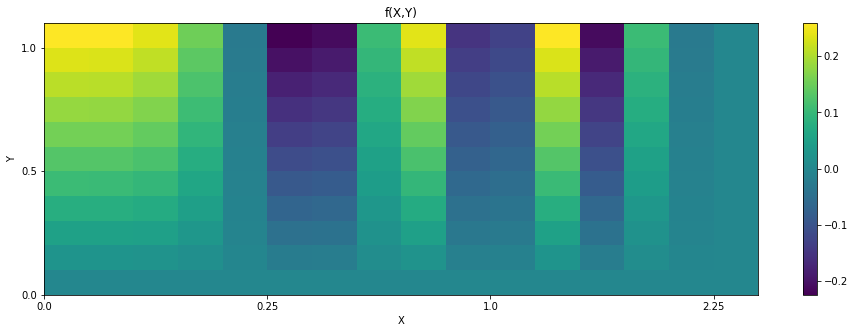

In [160]:
pts = np.load('../data/points.npy')
f = np.load('../data/function_values.npy')
reshape_order = 'F'

x = np.sort(np.unique(pts[:,0]))
y = np.sort(np.unique(pts[:,1]))

plt.figure(figsize=(16,5))
plt.pcolormesh(np.reshape(f, (len(x), len(y)), order=reshape_order))
plt.colorbar()

plt.title('f(X,Y)')
plt.xlabel('X')
plt.ylabel('Y')

plt.yticks(range(0,len(x),5), x[::5]);
plt.xticks(range(0,len(y),5), y[::5]);

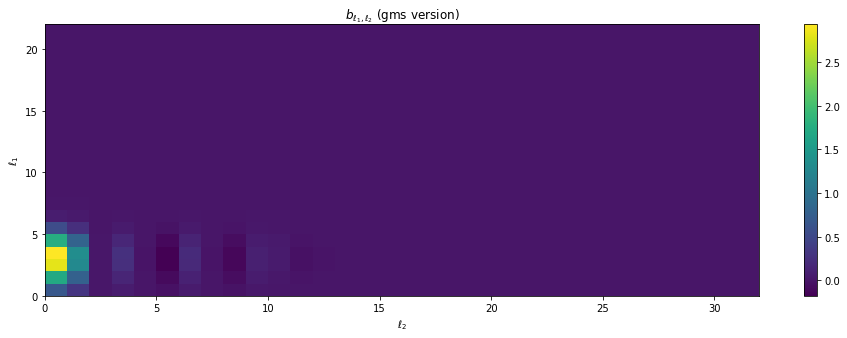

In [36]:
suffix = 'gms'
b = np.load('../data/b_{}.npy'.format(suffix))

plt.figure(figsize=(16,5))
plt.pcolormesh(b)
plt.colorbar()

plt.title('$b_{{\ell_1, \ell_2}}$ ({} version)'.format(suffix))
plt.xlabel('$\ell_2$')
plt.ylabel('$\ell_1$')

plt.yticks(range(0,b.shape[0],5))
plt.xticks(range(0,b.shape[1],5));

## Kernel & $\beta$

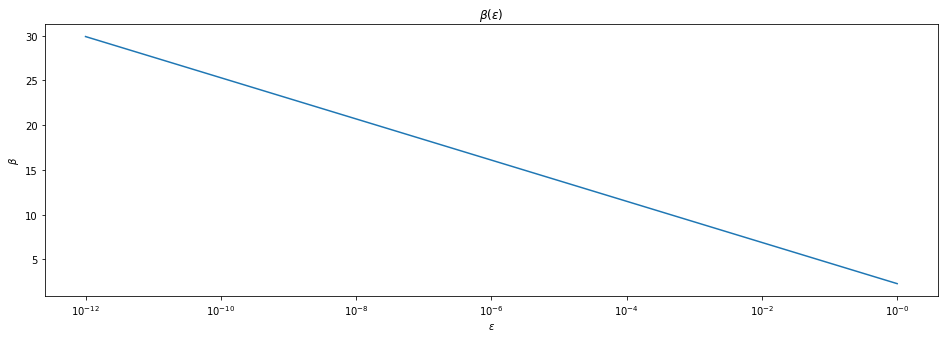

In [107]:
epsilons = np.array([pow(10,-i) for i in range(13)])
betas = np.vectorize(compute_beta)(epsilons)

plt.figure(figsize=(16,5))
plt.plot(epsilons, betas)

plt.title('$\\beta(\epsilon)$')
plt.xlabel('$\epsilon$')
plt.ylabel('$\\beta$')

labels = ['$10^{{-{}}}$'.format(i) for i in range(len(epsilons))]

plt.xscale('log')
plt.xticks(epsilons[::2], labels[::2]);
plt.show()

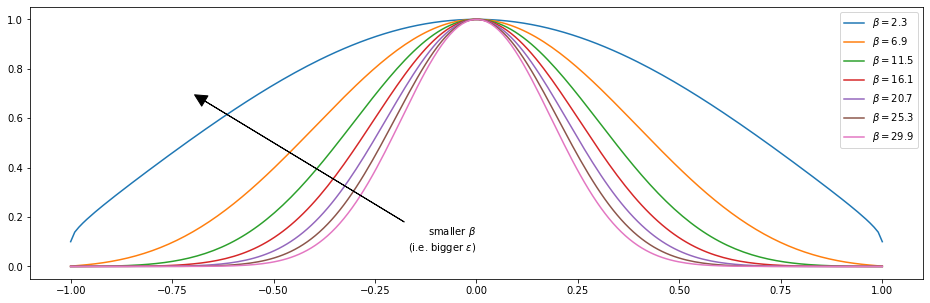

In [137]:
zs = np.linspace(-1, 1, 200)

plt.figure(figsize=(16,5))
for beta in np.round(betas[::2],2):
    plt.plot(zs, kernel(zs, beta), label='$\\beta=${}'.format(beta))
plt.legend();

plt.annotate('smaller $\\beta$\n(i.e. bigger $\epsilon$)', xy=(-0.7, 0.7),  xycoords='data',
            xytext=(0.5,0.2), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01, width=0.1),
            horizontalalignment='right', verticalalignment='top',
            );

## Kernel grid ($\epsilon = 1.e-10$)

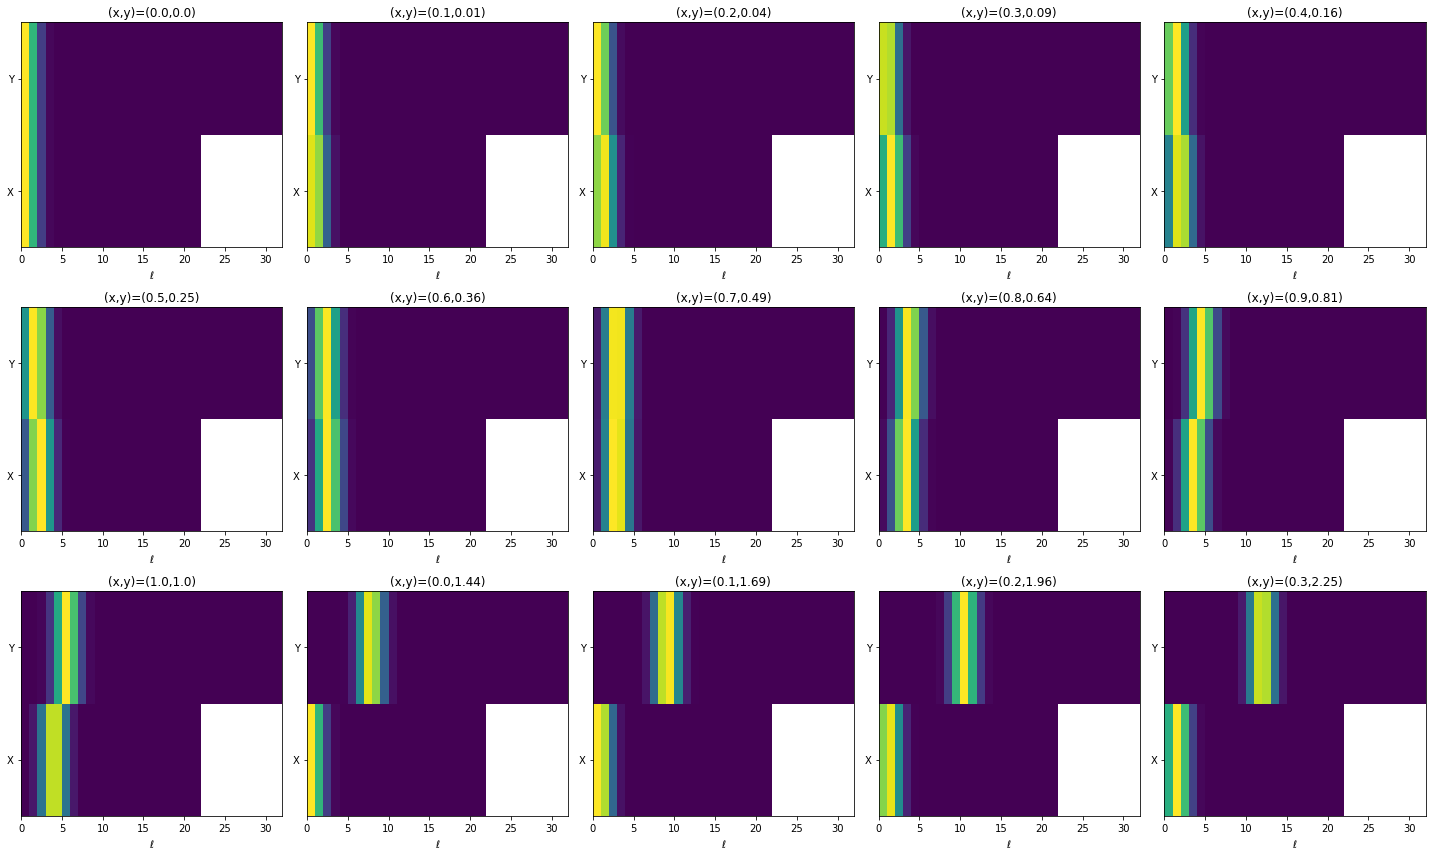

In [183]:
krn_vals = np.load('../data/krn_vals.npy')

epsilon = 1.e-10
n = fine_grid_size(np.array([len(x), len(y)]), compute_w(epsilon))
krn_vals[:,0,n[0]:] = np.nan
krn_vals[:,1,n[1]:] = np.nan

fig = plt.figure(figsize=(20,12))

for pos,i in enumerate(list(range(len(pts)))[::12]):
    plt.subplot(3,5,pos+1)
    plt.pcolormesh(krn_vals[i])
    
    plt.title('(x,y)=({},{})'.format(*np.round(pts[i],2)))
    plt.xlabel('$\ell$')
    
    plt.yticks([0.5,1.5], ['X', 'Y'])
    
fig.tight_layout()
plt.show()